# **Fatty liver Prediction**

*Predict whether a person has fatty liver or not.*

### Challenges

1. General data analysis.
2. Data preprocessing and cleaning.
3. Split dataset to test & train data.
4. ANN model design.
5. Model Training & evaluation.
6. Prediction
7. Wrong prediction and suggestions for improvement (false negetive/positive).
8. Callbacks APIs (EarlyStopping & ModelCheckpoint)

# 1. General data analysis

Before training a machine learning model, it’s crucial to perform data analysis and preparation. Here are some essential steps.

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
df = pd.read_csv('data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# Exploring the dataset

In [ ]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [ ]:
# Returns an object with all of the column headers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

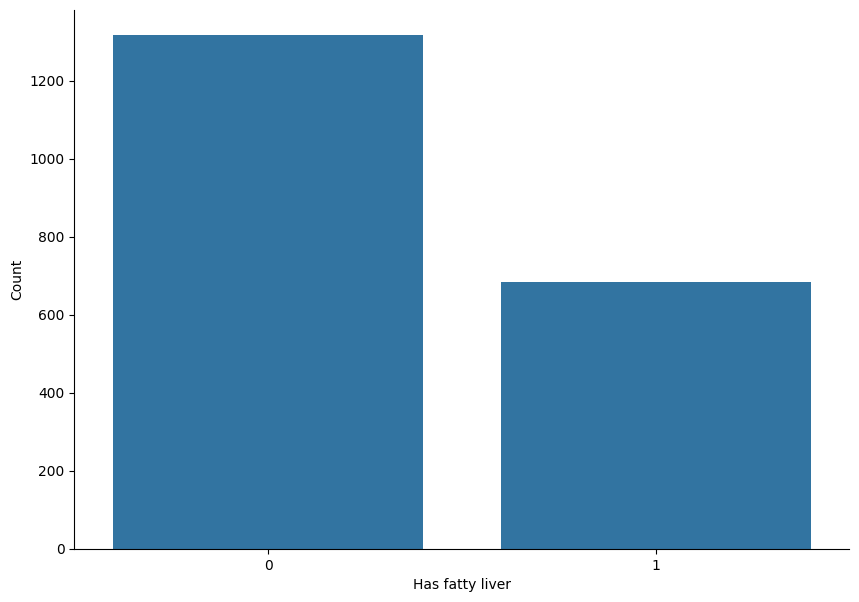

In [ ]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has fatty liver')
plt.ylabel('Count')

plt.show()

# 2. Data preprocessing & cleaning

In [ ]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

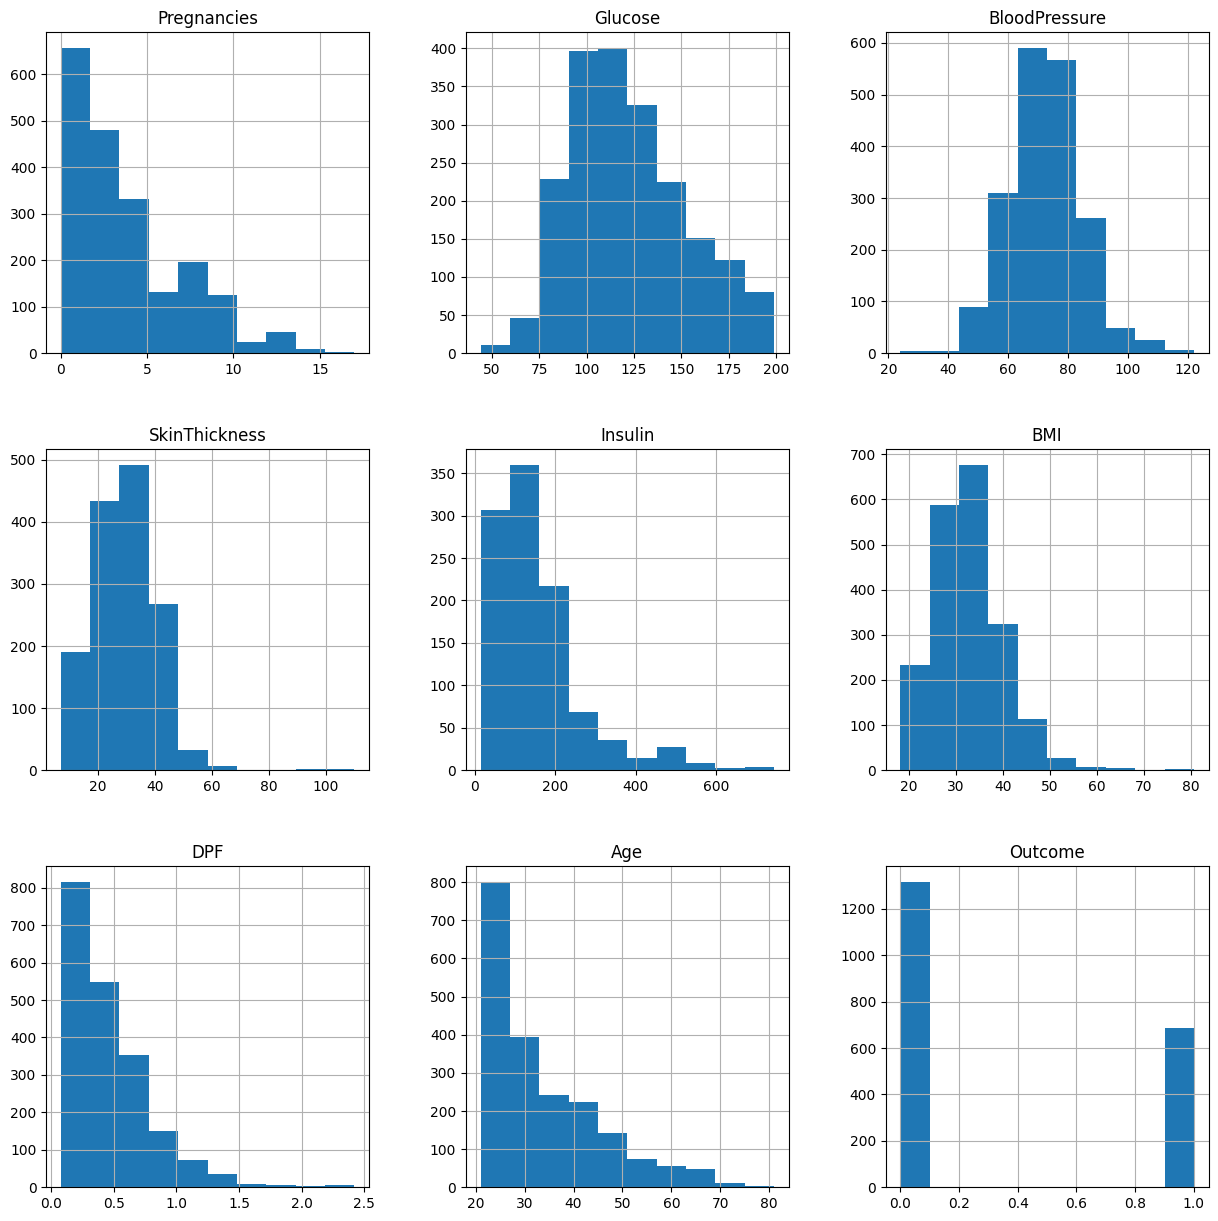

In [ ]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [ ]:
# Replacing NaN value by mean, median depending upon distribution
""" If there is normal(Gaws) or symmetric distribution, replacement by mean
is better."""

# If there are outliers, median is better.

# Replacing by mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

#Replacing by median.
df_copy['Pregnancies'].fillna(df_copy['Pregnancies'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['DPF'].fillna(df_copy['DPF'].median(), inplace=True)
df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)

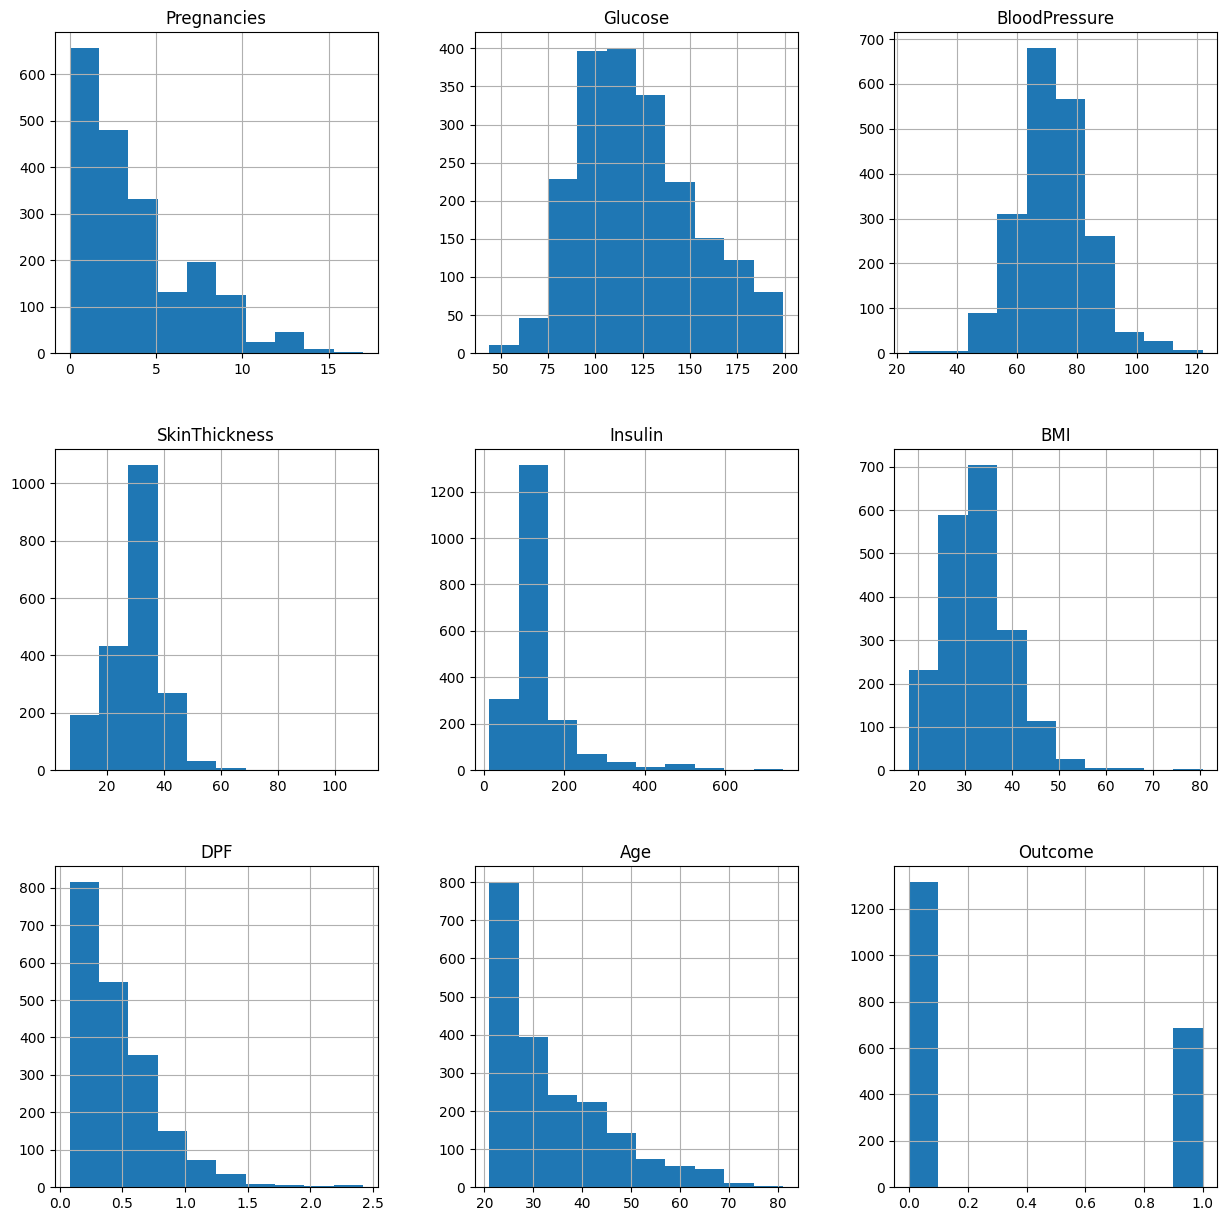

In [ ]:

# Plotting histogram of dataset after replacing NaN values

p = df_copy.hist(figsize = (15,15))

In [ ]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Prediction about feature importance

The problem is non-linear and each feature importance needs specialized knowledge in the field of medicine or related sciences. However, Features with high variance are likely to be important, as they capture more information about the data.

In [ ]:
feature_variance = df.var()
print(feature_variance)

Pregnancies         10.930053
Glucose           1028.397392
BloodPressure      368.191425
SkinThickness      259.314432
Insulin          12361.111040
BMI                 66.420881
DPF                  0.104686
Age                138.919770
Outcome              0.225149
dtype: float64


# 3. Split dataset to test & train data

In [ ]:
# split and standard the data in this place
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_copy[["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI" , "DPF" , "Age"]] , df_copy[["Outcome"]]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)


# 4. ANN model design

In [ ]:
#create nueral network model in kears/tensorflow in this place

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))  # Input layer
model.add(Dense(17, activation='tanh'))
model.add(Dense(35, activation='tanh'))
model.add(Dense(35, activation='tanh'))
model.add(Dense(17, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# 5. Model Training & evaluation

In [ ]:
# optimizer and learning rate selection
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=64)

# Storing training steps and epochs in order to plot in the future
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/300
25/25 [==============================] - 1s 3ms/step - loss: 0.5885 - accuracy: 0.6756
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7400
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7469
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7600
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7619
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.7731
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7725
Epoch 8/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7844
Epoch 9/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.7856
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7869
Epoch 11/

# Evaluation

In [ ]:
# evaluation your model in this place
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

threshold = 0.5
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > threshold).astype(int)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred_binary)
matrix

13/13 [==============================] - 0s 2ms/step


array([[248,   5],
       [  0, 147]])

In [ ]:
# Classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred_binary, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      0.98      0.99       253
     class 2       0.97      1.00      0.98       147

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
# Overall accuracy score

accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.9875

# Visualization

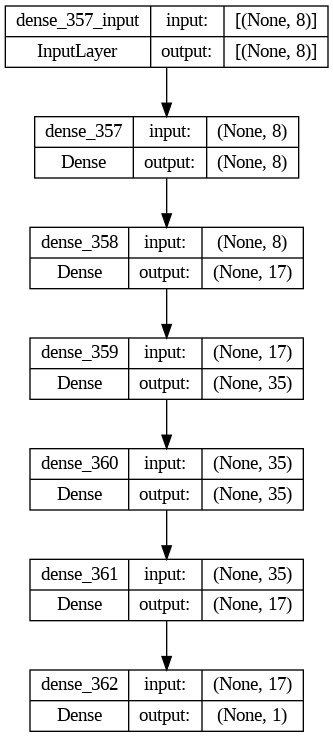

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

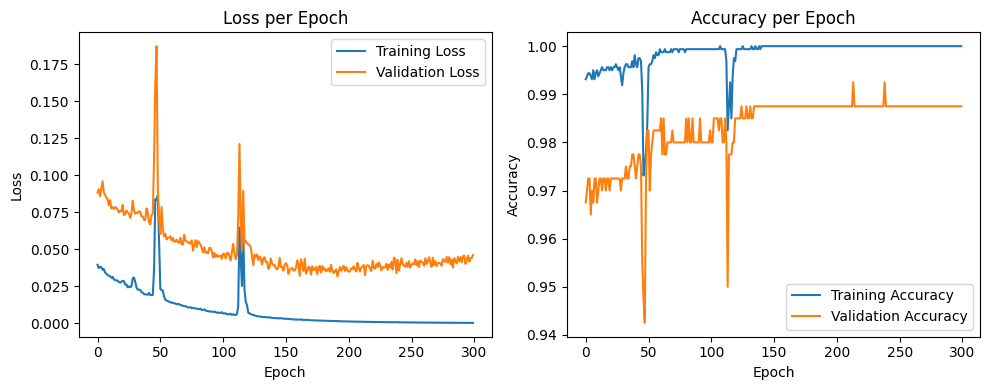

In [ ]:
# Loss per epoch plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

# Accuracy per epoch plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Prediction

In [ ]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)
    prediction = model.predict(x)
    binary_prediction = (y_pred > 0.5).astype(int)
    return binary_prediction

In [ ]:
# Prediction 1 // this sample didnt have fatty liver
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have fatty liver.')
else:
  print("Great! You don't have fatty liver.")

1/1 [==============================] - 0s 27ms/step
Oops! You have fatty liver.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 7. Wrong prediction and suggestions for improvement (false negetive/positive).
Confusion matrix visualize the performance of the algorithm and represents the reliability of the model in prediction. In this problem, false negetive is more critical.

By implementing some of the strategies below, the values in the confusion matrix can be improved and the number of wrong predictions may be reduced.

1. Collect and preprocess high-quality large datasets.
2. Hyperparameters tuning.
3. Cross validation.
4. Study about choosing a different value of threshold.

# 8. Callbacks APIs (EarlyStopping & ModelCheckpoint)

According to developer's documentation, a callback is an object that can perform actions at various stages of training. These stages and point are:
1. At the start and end of training
2. At the start and end of each epoch
3. At the start and end of each batch
4. At the start and end of testing or prediction

One of its applications is hyperparameter tuning such as finding the optimum learning rate or activation function.

There are many callbacks available. These APIs are listed below.
1. Base Callback class
2. ModelCheckpoint
3. BackupAndRestore
4. TensorBoard
5. EarlyStopping
6. LearningRateScheduler
7. ReduceLROnPlateau
8. RemoteMonitor
9. LambdaCallback
10. TerminateOnNaN
11. CSVLogger
12. ProgbarLogger
13. SwapEMAWeights

It's also possible to create custom callbacks APIs(objects).

### ModelCheckpoint
This callback is used to save the state of a model's training or its weight metrics at any point of training. They can be loaded later to continue the training from the state saved.

### EarlyStopping

This API Stops training when the objective function or monitored metric has stopped improving. For example if the loss function is assumed as the objective function, it has to get minimized. EarlyStopping will stop training when loss is no longer decreasing.